# Career Con Competition
Robots are smart… by design. To fully understand and properly navigate a task, however, they need input about their environment.

In this competition, you’ll help robots recognize the floor surface they’re standing on using data collected from Inertial Measurement Units (IMU sensors).

We’ve collected IMU sensor data while driving a small mobile robot over different floor surfaces on the university premises. The task is to predict which one of the nine floor types (carpet, tiles, concrete) the robot is on using sensor data such as acceleration and velocity. Succeed and you'll help improve the navigation of robots without assistance across many different surfaces, so they won’t fall down on the job.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
dfX = pd.read_csv('X_train.csv')
dfY = pd.read_csv('y_train.csv')

In [0]:
# constructing the all data dataframe 
df = pd.merge(dfX, dfY, on='series_id', how='inner')

In [15]:
df.columns

Index(['row_id', 'series_id', 'measurement_number', 'orientation_X',
       'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z', 'group_id',
       'surface'],
      dtype='object')

# EDA

In [239]:
df.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,fine_concrete
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,13,fine_concrete
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,13,fine_concrete
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,13,fine_concrete


In [0]:
df_new = df.groupby('series_id').first()

In [250]:
df_new.head()

,row_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
series_id,,,,,,,,,,,,,,
0,0_0,0,-0.75853,-0.63435,-0.104880,-0.105970,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete
1,1_0,0,-0.95896,0.24074,0.030758,-0.146610,0.283420,0.002192,-0.050810,2.18480,2.2526,-8.9503,31,concrete
2,2_0,0,-0.50944,-0.84779,-0.129460,-0.070378,-0.006752,-0.026183,0.088730,0.39932,3.6066,-5.7442,20,concrete
3,3_0,0,-0.93940,0.31003,0.038299,-0.141230,-0.326890,0.070941,-0.065173,0.60248,1.7016,-7.1944,31,concrete
4,4_0,0,-0.88673,0.43740,0.061771,-0.136300,0.025631,0.048867,-0.122520,-0.13289,3.1301,-9.8091,22,soft_tiles


In [0]:
# data for EDA
df_vis = df_new.drop(['row_id', 'group_id', 'measurement_number'], axis = 1)

In [252]:
df_vis.shape

(493, 11)

In [253]:
df_vis.describe()

,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,0.043555,-0.170943,-0.025637,0.007969,0.002127,0.008061,-0.022641,0.138711,3.011185,-9.334735
std,0.682339,0.694728,0.104874,0.104384,0.095892,0.071476,0.171411,1.413394,1.821762,2.109601
min,-0.988450,-0.989300,-0.158070,-0.151950,-0.442770,-0.377400,-0.754350,-7.402400,-7.190500,-20.739000
25%,-0.660150,-0.857790,-0.127250,-0.097309,-0.028546,-0.021975,-0.076421,-0.407410,2.170300,-10.052000
50%,0.103300,-0.419610,-0.057206,0.010784,0.001676,0.005123,-0.002047,0.136700,2.927900,-9.388400
75%,0.801720,0.438680,0.061283,0.122670,0.035238,0.043035,0.050364,0.602480,3.784800,-8.842700
max,0.989100,0.988440,0.152830,0.149670,0.428650,0.253150,0.652550,5.961300,12.558000,2.113900


In [254]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 492
Data columns (total 11 columns):
orientation_X            493 non-null float64
orientation_Y            493 non-null float64
orientation_Z            493 non-null float64
orientation_W            493 non-null float64
angular_velocity_X       493 non-null float64
angular_velocity_Y       493 non-null float64
angular_velocity_Z       493 non-null float64
linear_acceleration_X    493 non-null float64
linear_acceleration_Y    493 non-null float64
linear_acceleration_Z    493 non-null float64
surface                  493 non-null object
dtypes: float64(10), object(1)
memory usage: 46.2+ KB


In [255]:
labels = df_vis['surface'].unique()
print(labels)

['fine_concrete' 'concrete' 'soft_tiles' 'tiled' 'soft_pvc'
 'hard_tiles_large_space' 'carpet' 'hard_tiles' 'wood']


In [0]:
# searching for missing data
df_vis.isnull().sum()

In [0]:
index_missing = df_vis.isnull().any(axis=1).values.argmax()

In [0]:
df_vis = df_vis.drop([index_missing], axis = 0)

In [0]:
# confirming the result
df_vis.isnull().sum()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


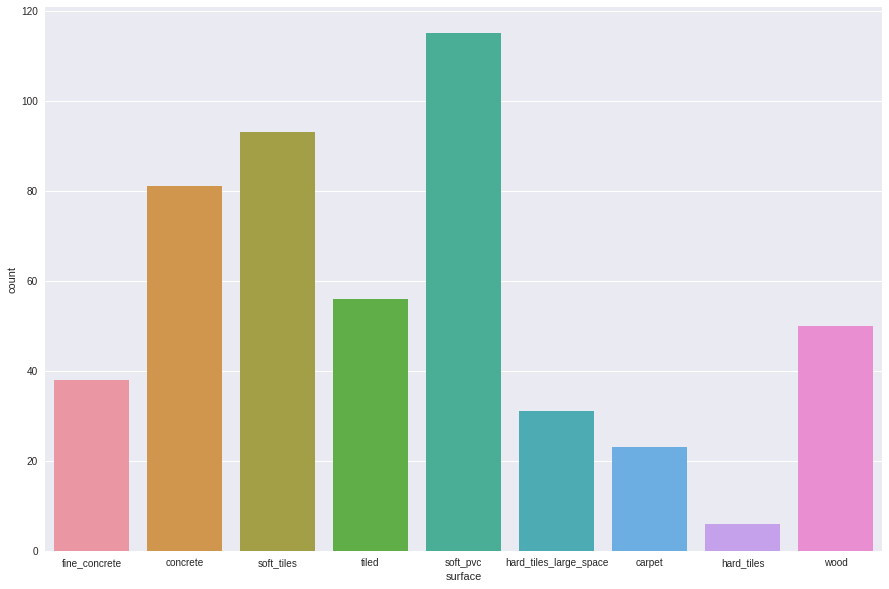

In [257]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'surface', data = df_vis)

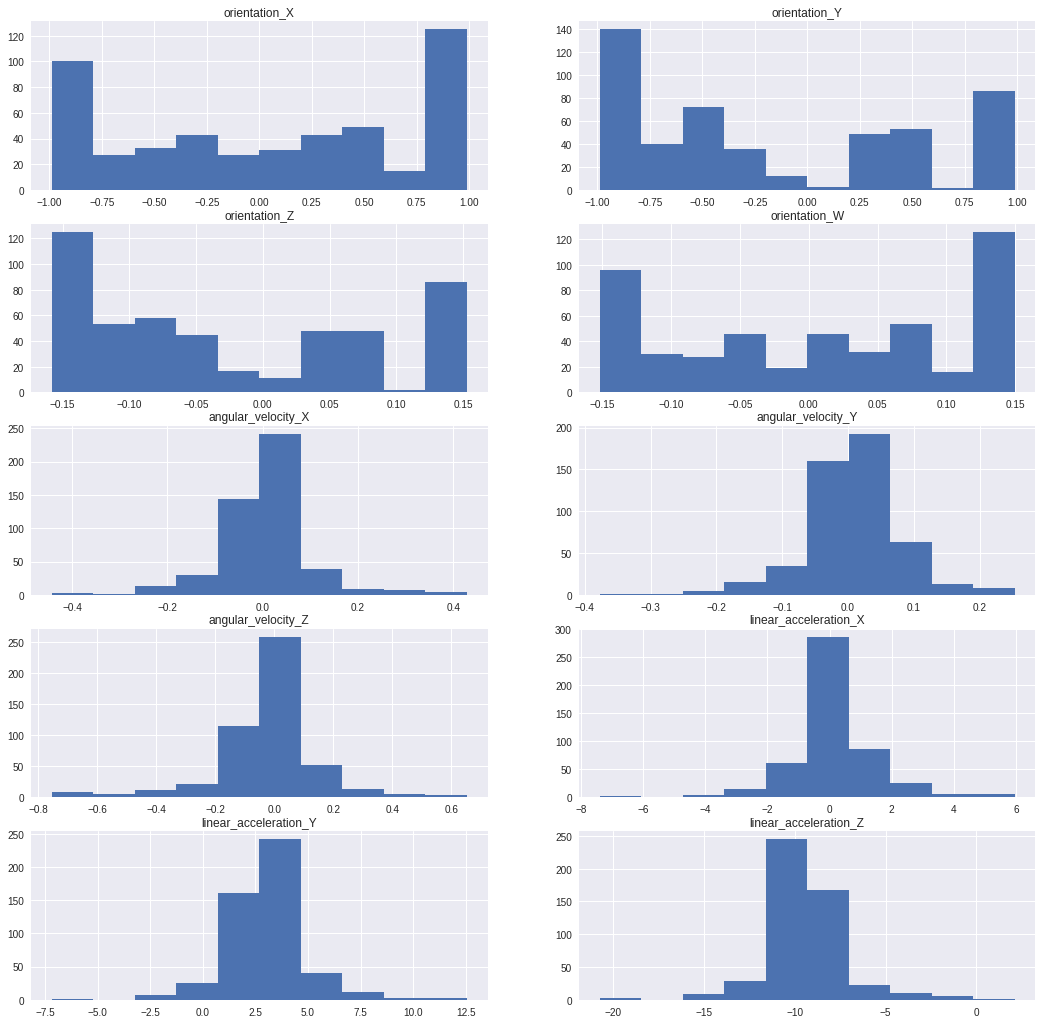

In [258]:
# ploting distribution
fig = plt.figure(figsize = (18,18))
for i in range(10):
  ax = fig.add_subplot(5, 2, i+1)
  ax.set_title(df_vis.columns[i])
  ax.hist(df_vis.iloc[:,i])

In [0]:
# try to see the correlation
df_vis.corrwith(df_vis.surface).plot.bar(figsize = (20,10), grid = True, title = 'Correlation with Surface Variable')

In [0]:
correlations = df_vis.corr()

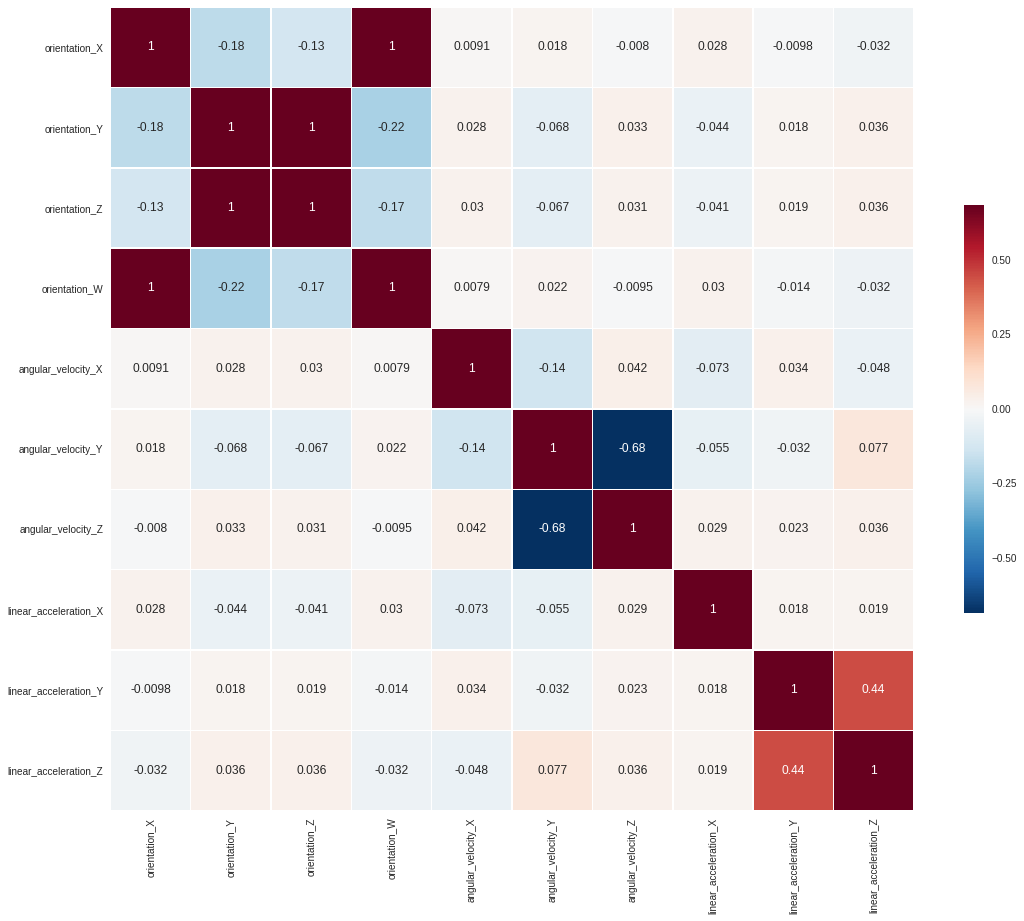

In [261]:
plt.figure(figsize = (18,15))
sns.heatmap(correlations, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

## Data preprocessing

In [0]:
X = df_vis.iloc[:, :-1]
y = df_vis.iloc[:, -1]

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [265]:
x_train.shape

(345, 10)

In [0]:
# scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [267]:
# do some features importance with random_forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
names = df_vis.columns.values
# Fit the model
rfc.fit(X, y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.1838, 'orientation_W'), (0.1786, 'orientation_Y'), (0.1783, 'orientation_X'), (0.1452, 'orientation_Z'), (0.0637, 'angular_velocity_Y'), (0.0616, 'angular_velocity_Z'), (0.0587, 'linear_acceleration_Z'), (0.0453, 'linear_acceleration_Y'), (0.0443, 'angular_velocity_X'), (0.0405, 'linear_acceleration_X')]


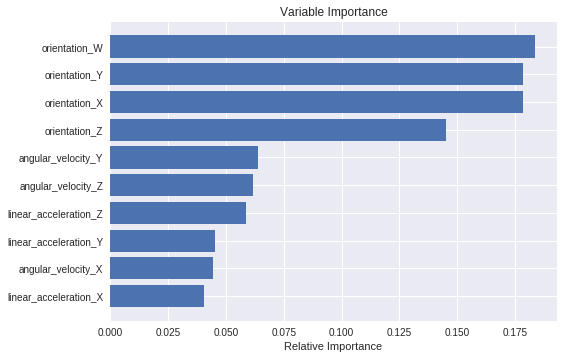

In [268]:
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [155]:
x_train.shape

(44165, 10)

# Models Building

In [269]:
# making evaluation
plt.figure(figsize = (10,10))
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
def evaluate(clf):
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    cm = confusion_matrix(y_test, y_pred)
    print("The Scores for {} are: Accuracy of {}, F1 of {} and CM".format(type(clf).__name__, accuracy, f1))
    sns.heatmap(cm, annot = True , fmt='g')

<Figure size 720x720 with 0 Axes>

In [270]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 200)
clf_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The Scores for LogisticRegression are: Accuracy of 0.41216216216216217, F1 of 0.3956978381565034 and CM


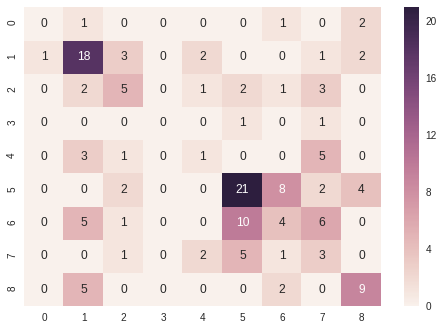

In [271]:
evaluate(clf_lr)

In [272]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The Scores for SVC are: Accuracy of 0.46621621621621623, F1 of 0.44261414261414256 and CM


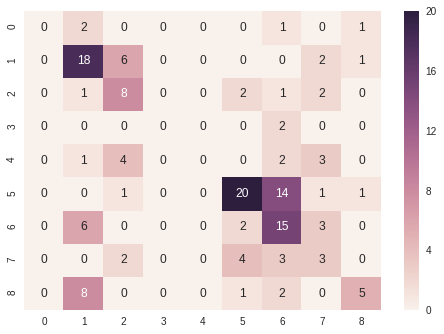

In [273]:
evaluate(clf_svm)
# best for C of 200 and Kenrel of rbf

In [274]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Scores for DecisionTreeClassifier are: Accuracy of 0.7567567567567568, F1 of 0.757335837494347 and CM


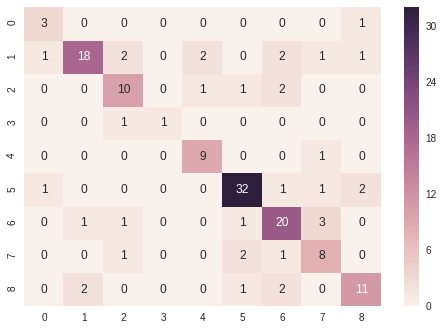

In [275]:
evaluate(clf_dt)

In [276]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The Scores for RandomForestClassifier are: Accuracy of 0.6621621621621622, F1 of 0.6510937844744414 and CM


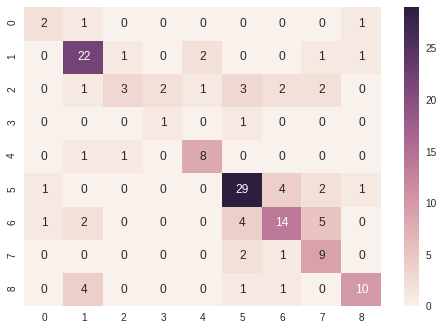

In [277]:
evaluate(clf_rf)

In [278]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
clf_ab = AdaBoostClassifier(n_estimators=100, learning_rate=0.3)
clf_ab.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.3, n_estimators=100, random_state=None)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The Scores for AdaBoostClassifier are: Accuracy of 0.4797297297297297, F1 of 0.43166293882997414 and CM


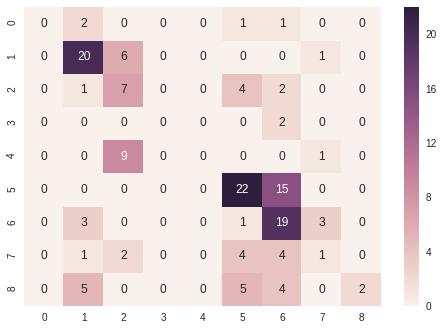

In [279]:
evaluate(clf_ab)

In [280]:
clf_bg = BaggingClassifier()
clf_bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

The Scores for BaggingClassifier are: Accuracy of 0.7094594594594594, F1 of 0.7030787644632361 and CM


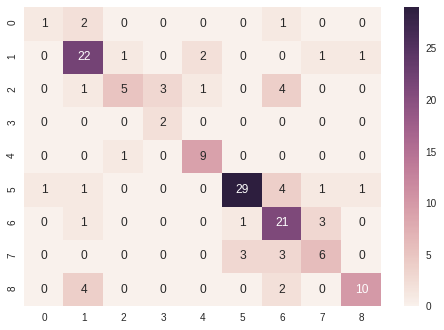

In [281]:
evaluate(clf_bg)

In [282]:
from sklearn.naive_bayes import BernoulliNB
clf_bnb = BernoulliNB()
clf_bnb.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The Scores for BernoulliNB are: Accuracy of 0.33783783783783783, F1 of 0.3242390423765507 and CM


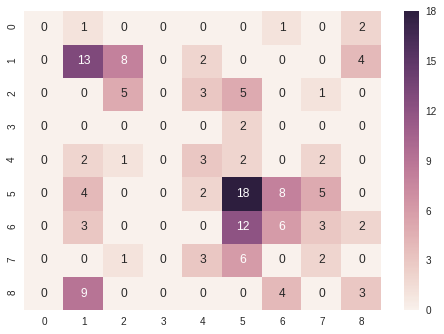

In [283]:
evaluate(clf_bnb)

In [286]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(100)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The Scores for KNeighborsClassifier are: Accuracy of 0.24324324324324326, F1 of 0.22376949638955343 and CM


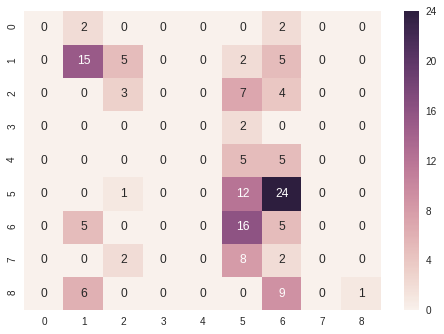

In [287]:
evaluate(clf_knn)

In [288]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

The Scores for GaussianNB are: Accuracy of 0.5067567567567568, F1 of 0.52050885034756 and CM


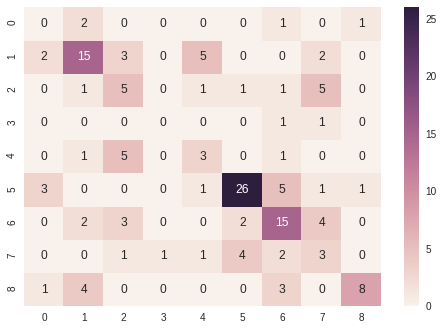

In [289]:
evaluate(clf_nb)

In [301]:
# building deep neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [367]:
model = Sequential()
model.add(Dense(128 , input_dim = x_train.shape[1], activation = 'tanh'))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'tanh'))
model.add(Dropout(0.4))
model.add(Dense(512, activation = 'tanh'))
model.add(Dropout(0.4))
model.add(Dense(1024, activation = 'tanh'))
model.add(Dropout(0.4))
model.add(Dense(9, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              525312    
__________

In [0]:
from keras.utils import to_categorical
ytrain_nn = to_categorical(y_train)
ytest_nn = to_categorical(y_test)

In [0]:

from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('.mdl_wts.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [372]:
history = model.fit(x_train, ytrain_nn, epochs = 100 ,callbacks= [checkpoint], validation_data = (x_test, ytest_nn), batch_size = 8)

Train on 345 samples, validate on 148 samples
Epoch 1/100
345/345 [==============================] - 2s 4ms/step - loss: 2.0909 - acc: 0.2957 - val_loss: 1.7951 - val_acc: 0.3378

Epoch 00001: val_acc improved from -inf to 0.33784, saving model to .mdl_wts.hdf5
Epoch 2/100
345/345 [==============================] - 0s 1ms/step - loss: 1.9390 - acc: 0.3507 - val_loss: 1.8609 - val_acc: 0.2905

Epoch 00002: val_acc did not improve from 0.33784
Epoch 3/100
345/345 [==============================] - 0s 1ms/step - loss: 2.0167 - acc: 0.3246 - val_loss: 1.9862 - val_acc: 0.2703

Epoch 00003: val_acc did not improve from 0.33784
Epoch 4/100
345/345 [==============================] - 0s 978us/step - loss: 2.0521 - acc: 0.2696 - val_loss: 1.6630 - val_acc: 0.3919

Epoch 00004: val_acc improved from 0.33784 to 0.39189, saving model to .mdl_wts.hdf5
Epoch 5/100
345/345 [==============================] - 0s 993us/step - loss: 1.8838 - acc: 0.3304 - val_loss: 1.7953 - val_acc: 0.4054

Epoch 00005: 

In [373]:
model.load_weights(".mdl_wts.hdf5")
score = model.evaluate(x_test, ytest_nn)
print(score[1])

148/148 [==============================] - 0s 93us/step
0.6283783783783784


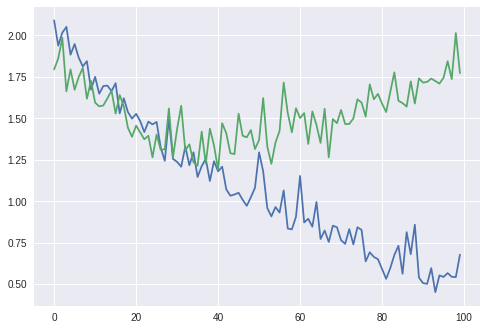

In [374]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [0]:
y_nn = model.predict(x_sub_std)

In [0]:
y_arg =np.argmax(y_nn, axis = 1)

# Creating Submissions

In [0]:
df_sub = pd.read_csv('X_test.csv')

In [163]:
df_sub.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


In [0]:
x_sub = df_sub.iloc[:,3:]

In [0]:
x_sub_std = std.transform(x_sub)

In [154]:
x_sub_std.shape

(488448, 10)

In [0]:
y_sub_dt = clf_dt.predict(x_sub_std)

In [382]:
(y_arg == y_sub_svm).std()

0.4999872221626179

In [0]:
label_y_sub = encoder.inverse_transform(y_sub_dt)

In [393]:
label_y_sub

array(['tiled', 'tiled', 'tiled', ..., 'wood', 'wood', 'wood'],
      dtype=object)

In [0]:
surface_predicted = pd.Series(label_y_sub, name = 'surface')

In [0]:
series_id = df_sub.iloc[:, 1]

In [0]:
submission = pd.concat([series_id, surface_predicted], axis = 1)

In [0]:
submission.head()

In [0]:
maybe = submission.drop_duplicates(subset = 'series_id')

In [399]:
maybe.shape

(3816, 2)

In [0]:
maybe.to_csv('nineth_submission.csv', index = False)

In [0]:
one = pd.read_csv('first_submission.csv')

In [198]:
one.shape

(3816, 2)

In [0]:
maybe.surface

In [233]:
submission.head()

,series_id,surface
0,0,hard_tiles_large_space
1,0,hard_tiles_large_space
2,0,tiled
3,0,hard_tiles_large_space
4,0,tiled
